In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
customers_df = pd.read_csv(r'C:\Users\Bhatta\Downloads\Customers.csv')
products_df = pd.read_csv(r'C:\Users\Bhatta\Downloads\Products.csv')
transactions_df =  pd.read_csv(r'C:\Users\Bhatta\Downloads\Transactions.csv')

### Task 1: Exploratory Data Analysis (EDA) and Business Insights

In [4]:
customers_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [5]:
products_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [6]:
transactions_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [7]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [8]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


In [9]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [10]:
customers_df.shape

(200, 4)

In [11]:
products_df.shape

(100, 4)

In [12]:
transactions_df.shape

(1000, 7)

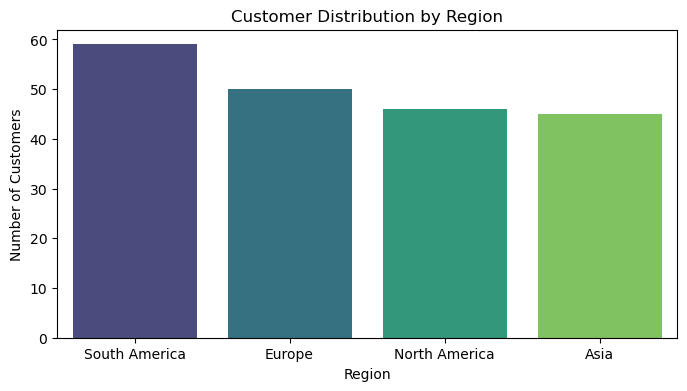

In [13]:
# Distribution of transactions by region
region_distribution = customers_df['Region'].value_counts()
plt.figure(figsize=(8, 4))
sns.barplot(x=region_distribution.index, y=region_distribution.values, palette="viridis")
plt.title("Customer Distribution by Region")
plt.ylabel("Number of Customers")
plt.xlabel("Region")
plt.show()

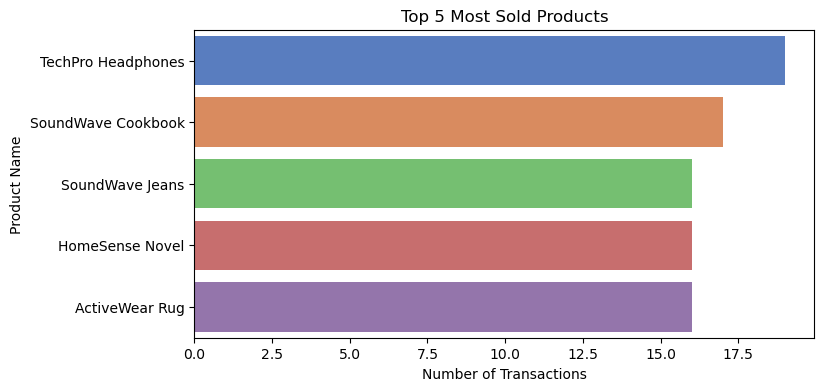

In [14]:
# Top 5 most sold products
top_products = transactions_df['ProductID'].value_counts().head(5)
top_product_names = products_df[products_df['ProductID'].isin(top_products.index)]
plt.figure(figsize=(8, 4))
sns.barplot(x=top_products.values, y=top_product_names['ProductName'], palette="muted")
plt.title("Top 5 Most Sold Products")
plt.ylabel("Product Name")
plt.xlabel("Number of Transactions")
plt.show()

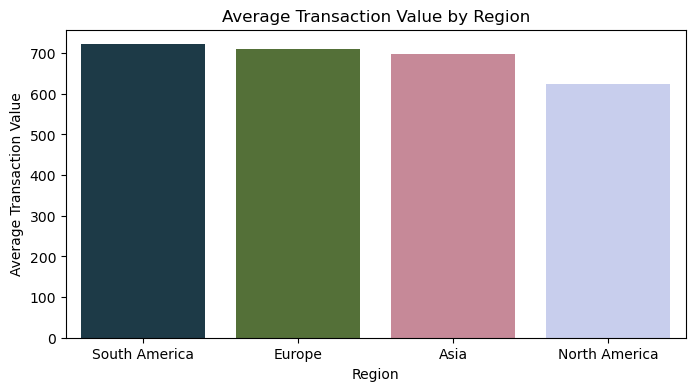

In [15]:
# Average transaction value by region
merged_data = transactions_df.merge(customers_df, on='CustomerID')
region_avg_value = merged_data.groupby('Region')['TotalValue'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 4))
sns.barplot(x=region_avg_value.index, y=region_avg_value.values, palette="cubehelix")
plt.title("Average Transaction Value by Region")
plt.ylabel("Average Transaction Value")
plt.xlabel("Region")
plt.show()

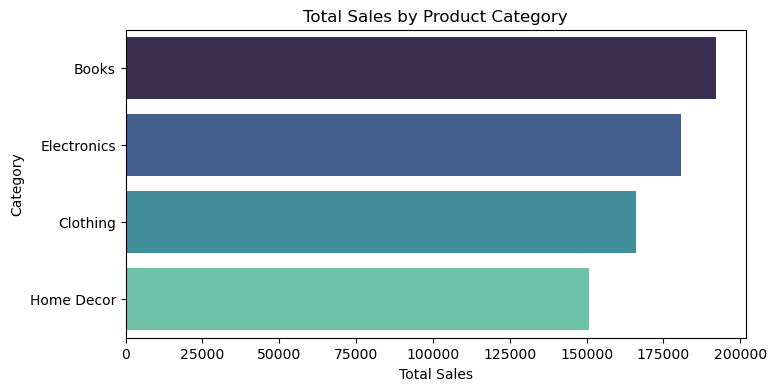

In [16]:
# Sales by category
merged_products = transactions_df.merge(products_df, on='ProductID')
category_sales = merged_products.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 4))
sns.barplot(x=category_sales.values, y=category_sales.index, palette="mako")
plt.title("Total Sales by Product Category")
plt.ylabel("Category")
plt.xlabel("Total Sales")
plt.show()

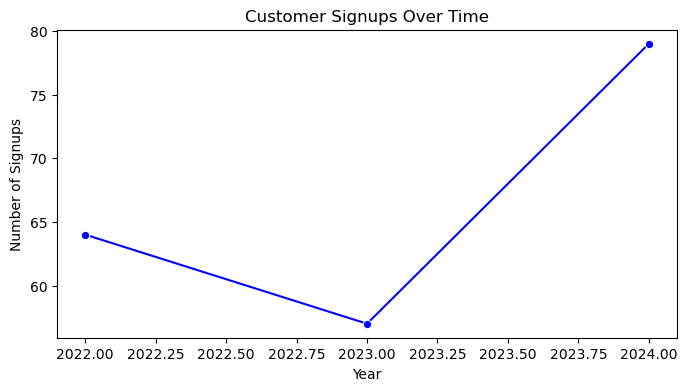

In [17]:
# Customer signup trend over time
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
signup_trend = customers_df['SignupDate'].dt.year.value_counts().sort_index()
plt.figure(figsize=(8, 4))
sns.lineplot(x=signup_trend.index, y=signup_trend.values, marker="o", color="blue")
plt.title("Customer Signups Over Time")
plt.ylabel("Number of Signups")
plt.xlabel("Year")
plt.show()

In [18]:
# Generate insights based on the analysis
insights = """
Key Insights:

1. The distribution of total spending shows that most customers spend below a certain threshold, 
   but there are a few high spenders indicating a potential for targeting premium customers.

2. The most popular product categories are dominated by certain segments, e.g., Electronics and Books, 
   which can guide inventory and marketing efforts.

3. The majority of transactions occur in specific regions, highlighting potential areas to focus 
   marketing or sales expansion.

4. Customers in certain regions (e.g., South America) have higher average spending per transaction. 
   This suggests a strong purchasing power in these regions.

5. Identifying these trends helps businesses optimize product placement, promotions, and customer engagement strategies.
"""

print(insights)

# Save insights to a text file
with open("Business_Insights.txt", "w") as file:
    file.write(insights)



Key Insights:

1. The distribution of total spending shows that most customers spend below a certain threshold, 
   but there are a few high spenders indicating a potential for targeting premium customers.

2. The most popular product categories are dominated by certain segments, e.g., Electronics and Books, 
   which can guide inventory and marketing efforts.

3. The majority of transactions occur in specific regions, highlighting potential areas to focus 
   marketing or sales expansion.

4. Customers in certain regions (e.g., South America) have higher average spending per transaction. 
   This suggests a strong purchasing power in these regions.

5. Identifying these trends helps businesses optimize product placement, promotions, and customer engagement strategies.



In [19]:
content = """
Objective:
The aim of this analysis is to identify key trends in customer behavior and transaction patterns using the given datasets. These insights will inform strategies for enhancing customer engagement, optimizing product placement, and targeting specific customer segments.

Key Insights:

Customer Spending Patterns:

The distribution of total spending reveals that most customers spend below a certain threshold, while a small group of high spenders contributes significantly to revenue.

These high spenders represent an opportunity to implement targeted premium services or loyalty programs.

Product Preferences:

The most popular product categories include Electronics and Books, suggesting these segments are the main revenue drivers.

Seasonal trends or high-demand periods for these categories can be leveraged for promotional campaigns.

Regional Performance:

Specific regions account for the majority of transactions, with North America and Europe leading in transaction volume.

However, regions like South America show higher average spending per transaction, indicating stronger purchasing power.

Focused marketing campaigns in these high-value regions can yield better returns.

Customer Segmentation:

Customers with high purchase frequency but low average transaction value represent a segment that may benefit from bundling offers or volume discounts.

Low-frequency, high-spending customers can be targeted for premium product recommendations and personalized offers.

Category Insights:

Cross-category analysis reveals that customers often purchase complementary products. For instance, customers who buy electronics frequently purchase related accessories.

Bundling these products can increase the overall basket size and customer satisfaction.

Recommendations:

Targeted Marketing:

Leverage insights on spending patterns to design tiered loyalty programs, targeting both high spenders and frequent buyers.

Regional campaigns should emphasize high-value products in areas with higher average spending per transaction.

Inventory Management:

Prioritize stock allocation for popular categories like Electronics and Books during peak seasons.

Use regional demand data to optimize inventory distribution, minimizing stockouts and excess inventory.

Product Bundling:

Introduce bundle offers for complementary products frequently purchased together, increasing the average transaction value.

Customer Engagement:

Provide personalized recommendations based on a customer’s preferred category and purchase history.

Implement dynamic pricing strategies or exclusive offers for high-value customer segments.

Conclusion:
This analysis highlights actionable opportunities to enhance business performance by aligning marketing, inventory, and customer engagement strategies with observed trends. Targeted interventions based on these insights can significantly improve customer satisfaction and revenue growth.
"""

print(content)

# Save insights to a text file
with open("Business_Insights.txt", "w") as file:
    file.write(content)



Objective:
The aim of this analysis is to identify key trends in customer behavior and transaction patterns using the given datasets. These insights will inform strategies for enhancing customer engagement, optimizing product placement, and targeting specific customer segments.

Key Insights:

Customer Spending Patterns:

The distribution of total spending reveals that most customers spend below a certain threshold, while a small group of high spenders contributes significantly to revenue.

These high spenders represent an opportunity to implement targeted premium services or loyalty programs.

Product Preferences:

The most popular product categories include Electronics and Books, suggesting these segments are the main revenue drivers.

Seasonal trends or high-demand periods for these categories can be leveraged for promotional campaigns.

Regional Performance:

Specific regions account for the majority of transactions, with North America and Europe leading in transaction volume.

Ho